<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/7_Cifar10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [ ]:
from tensorflow.keras import datasets
import numpy as np

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## 2. 데이터 시각화 (EDA)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


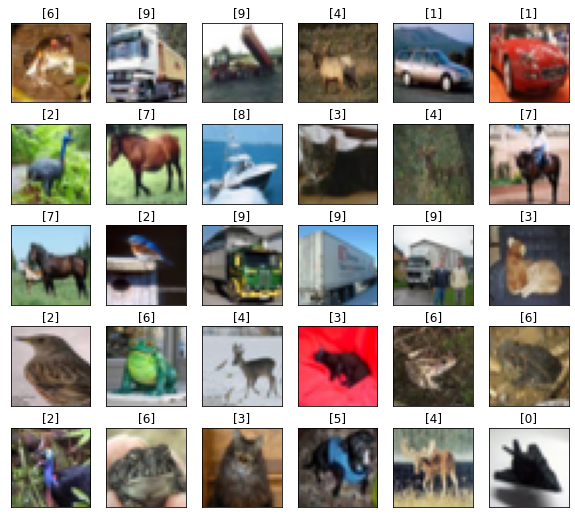

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
for i in range(30):
  plt.subplot(5,6,i+1)
  img=x_train[i]
  label=y_train[i]
  plt.title(label)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
plt.show()

* 이미지 확인

* 실제 데이터 확인

In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


* 데이터 시각화

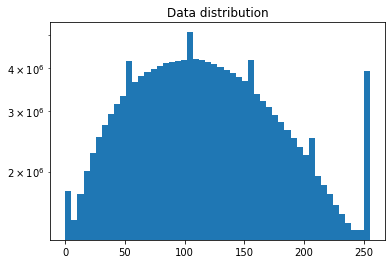

In [ ]:
plt.title('Data distribution')
plt.hist(np.reshape(x_train,(50000*32*32*3)),log=True,bins=50)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [ ]:
def minmax(x):
  x_min=np.min(x)
  x_max=np.max(x)
  return (x-x_min)/(x_max-x_min)

In [ ]:
x_train_minmax=minmax(x_train)
x_test_minmax=minmax(x_test)
x_train_minmax.shape,x_test_minmax.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

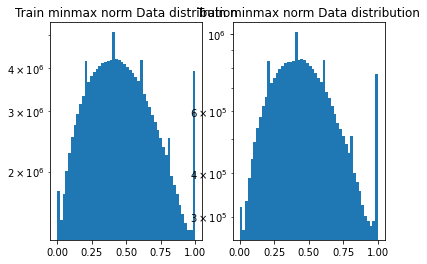

In [ ]:
plt.subplot(1,2,1)

plt.title('Train minmax norm Data distribution')
plt.hist(np.reshape(x_train_minmax,(50000*32*32*3)),log=True,bins=50)

plt.subplot(1,2,2)

plt.title('Train minmax norm Data distribution')
plt.hist(np.reshape(x_test_minmax,(10000*32*32*3)),log=True,bins=50)
plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [ ]:
def z_score(x):
  x_mean=np.mean(x)
  x_std=np.std(x)
  return (x-x_mean)/x_std

In [ ]:
x_train_zscore=z_score(x_train)
x_test_zscore=z_score(x_test)
x_train_zscore.shape,x_test_zscore.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

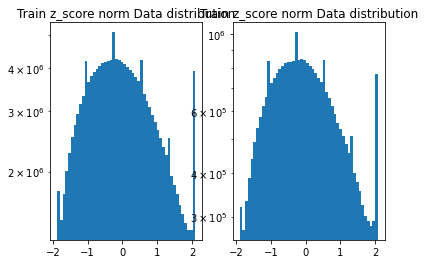

In [ ]:
plt.subplot(1,2,1)
plt.title('Train z_score norm Data distribution')
plt.hist(np.reshape(x_train_zscore,(50000*32*32*3)),log=True,bins=50)

plt.subplot(1,2,2)
plt.title('Train z_score norm Data distribution')
plt.hist(np.reshape(x_test_zscore,(10000*32*32*3)),log=True,bins=50)
plt.show()

### **one-hot coding**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print (y_train_onehot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# 모델
---

## 1. 모델구현
---

In [ ]:
from tensorflow.keras import models,layers,optimizers

### **Softmax regression**

In [ ]:
sr= models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape=[32,32,3]))
sr.add(layers.Dense(10,activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [ ]:
dnn1=models.Sequential(name='DNN1')
#input
dnn1.add(layers.Flatten(input_shape=[32,32,3]))#차원을 바꾸어주는 함수 Flatten
#hidden
dnn1.add(layers.Dense(100,activation='relu'))
dnn1.add(layers.Dense(100,activation='relu'))
#output
dnn1.add(layers.Dense(10,activation='softmax'))

dnn1.summary()

Model: "DNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn2=models.Sequential(name='DNN2')
#input
dnn2.add(layers.Flatten(input_shape=[32,32,3]))#차원을 바꾸어주는 함수 Flatten
#hidden
dnn2.add(layers.Dense(180,activation='relu'))
dnn2.add(layers.Dense(180,activation='relu'))
#output
dnn2.add(layers.Dense(10,activation='softmax'))

dnn2.summary()

Model: "DNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 180)               553140    
_________________________________________________________________
dense_5 (Dense)              (None, 180)               32580     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1810      
Total params: 587,530
Trainable params: 587,530
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [ ]:
cnn1=models.Sequential(name="CNN1")
#x data:(28 28)->2차원
#dense : (764)->1차원
#convolution :(28,28,1)->3차원 


#input layers
cnn1.add(layers.Reshape([32,32,3],input_shape=[32,32,3]))
#hidden layers
cnn1.add(layers.Conv2D(10,5,activation='relu'))
cnn1.add(layers.MaxPool2D(pool_size=3))
cnn1.add(layers.Conv2D(10,5,activation='relu'))
cnn1.add(layers.MaxPool2D(pool_size=3))

#output layer
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(10,activation='softmax'))

cnn1.summary()

Model: "CNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 10)          2510      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110    

In [ ]:
cnn2=models.Sequential(name="CNN2")
#x data:(28 28)->2차원
#dense : (764)->1차원
#convolution :(28,28,1)->3차원 


#input layers
cnn2.add(layers.Reshape([32,32,3],input_shape=[32,32,3]))
#hidden layers
cnn2.add(layers.Conv2D(15,5,activation='relu'))
cnn2.add(layers.MaxPool2D(pool_size=3))
cnn2.add(layers.Conv2D(15,5,activation='relu'))
cnn2.add(layers.MaxPool2D(pool_size=3))

#output layer
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(10,activation='softmax'))

cnn2.summary()

Model: "CNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 15)        1140      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 15)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 15)          5640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                160    

## 2. 학습
---

### **Softmax Regression**

In [ ]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

sr.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9515 - acc: 0.3016
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8424 - acc: 0.3529
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8149 - acc: 0.3644
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7964 - acc: 0.3729
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7831 - acc: 0.3765
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7690 - acc: 0.3830
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7640 - acc: 0.3852
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7581 - acc: 0.3866
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7508 - acc: 0.3922
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7467 - acc: 0.3958
Epoch 11/20
1563/1563 [======

### **DNN**

In [ ]:
dnn1.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

dnn1.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9014 - acc: 0.3185
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7221 - acc: 0.3862
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6439 - acc: 0.4185
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5898 - acc: 0.4371
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5514 - acc: 0.4496
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5180 - acc: 0.4617
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4906 - acc: 0.4726
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4674 - acc: 0.4789
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4422 - acc: 0.4877
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4199 - acc: 0.4965
Epoch 11/20
1563/1563 [======

In [ ]:
dnn2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

dnn2.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8839 - acc: 0.3257
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7015 - acc: 0.3933
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6182 - acc: 0.4273
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5614 - acc: 0.4472
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5191 - acc: 0.4617
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4817 - acc: 0.4757
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4509 - acc: 0.4838
Epoch 8/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4251 - acc: 0.4948
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3951 - acc: 0.5040
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3732 - acc: 0.5132
Epoch 11/20
1563/1563 [======

### CNN

In [ ]:
cnn1.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

cnn1.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 2.2344 - acc: 0.1423
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0039 - acc: 0.2547
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8521 - acc: 0.3124
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7659 - acc: 0.3539
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6981 - acc: 0.3795
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6451 - acc: 0.3983
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6077 - acc: 0.4139
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5791 - acc: 0.4228
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5572 - acc: 0.4279
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5389 - acc: 0.4370
Epoch 11/20
1563/1563 [=====

In [ ]:
cnn2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

cnn2.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1670 - acc: 0.1947
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9263 - acc: 0.2863
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7923 - acc: 0.3427
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7152 - acc: 0.3741
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6601 - acc: 0.3916
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6181 - acc: 0.4092
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5860 - acc: 0.4234
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5606 - acc: 0.4344
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5359 - acc: 0.4419
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5164 - acc: 0.4503
Epoch 11/20
1563/1563 [======

## 3. 성능평가
---

### Softmax Regression

In [ ]:
#testset을 평가

sr.evaluate(x_test_minmax,y_test_onehot)


313/313 [==============================] - 1s 3ms/step - loss: 1.8219 - acc: 0.3573


[1.8219150304794312, 0.3573000133037567]

### DNN

In [ ]:
dnn1.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 1.3791 - acc: 0.5074


[1.3790801763534546, 0.5073999762535095]

In [ ]:
dnn2.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 1.3652 - acc: 0.5207


[1.3652091026306152, 0.5206999778747559]

### CNN

In [ ]:
cnn1.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 1.4640 - acc: 0.4733


[1.4640065431594849, 0.4733000099658966]

In [ ]:
cnn2.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 1.5148 - acc: 0.4564


[1.5147584676742554, 0.4564000070095062]